# Análisis de Datos y de Supervivencia a un conjunto de datos de casas en el Estado de California:

El siguiente trabajo corresponde a una tarea correspondiente al módulo 3 del diplomado de Ciencia de Datos impartido por la Faculta de Química: 

## Acerca del conjunto de datos "California Housing Prices":



El conjunto de datos "California Housing Prices" ofrece una visión detallada de los precios medianos de las viviendas en diversos distritos de California, basándose en datos recopilados durante el censo de 1990. Este conjunto se ha convertido en una herramienta valiosa para la introducción a algoritmos de aprendizaje automático debido a su tamaño adecuado y su estructura accesible, proporcionando una plataforma ideal para enseñar los principios básicos de la ciencia de datos y la modelización predictiva.

El conjunto incluye una serie de variables que describen diversas características de las viviendas en los distritos de California, como su ubicación geográfica, antigüedad, tamaño y características socioeconómicas. Entre estas variables, se encuentran datos como la longitud y latitud, antigüedad media de las viviendas, número total de habitaciones y dormitorios, población, ingreso medio y valor medio de las viviendas, así como información sobre la proximidad al océano.

Este conjunto de datos ha sido utilizado en investigaciones académicas y forma parte integral del libro "Hands-On Machine Learning with Scikit-Learn and TensorFlow" de Aurélien Géron, lo que ha contribuido a su reconocimiento y utilidad en el ámbito de la ciencia de datos. El acceso a estos datos brinda la oportunidad de explorar y aplicar técnicas de análisis de datos, visualización y modelado predictivo en el contexto específico del mercado inmobiliario en California durante el censo de 1990.

El conjutno de datos fue adquirido de Kaggle y se encuentra disponible en la siguiente URL: https://www.kaggle.com/datasets/camnugent/california-housing-prices

## Importación de librerias:

In [75]:
# Importación de las librerias necesarias: 

import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns  
import warnings
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.regression.linear_model import OLS
from statsmodels.tools import add_constant
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from lifelines import KaplanMeierFitter
from lifelines.utils import median_survival_times


# Ignorar todos los warnings
warnings.filterwarnings("ignore")

In [2]:
# Creación y lectura del Dataframe: 

df = pd.read_csv('housing.csv')

En esta primera parte se analizará como esta compuesto el DataFrame para posteriormente hacer distintos análisis da datos con el conjunto de datos:

In [3]:
df.shape

(20640, 10)

In [4]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [5]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

Revisando la página de donde se obtuvieron los datos, se sabe que las columnas representan lo siguiente: 

1. longitude: Medida de cuán al oeste se encuentra una casa; un valor más alto indica que está más al oeste.
2. latitude: Medida de cuán al norte se encuentra una casa; un valor más alto indica que está más al norte.
3. housingMedianAge: Edad mediana de una casa dentro de una manzana; un número más bajo indica un edificio más nuevo.
4. totalRooms: Número total de habitaciones dentro de una manzana.
5. totalBedrooms: Número total de dormitorios dentro de una manzana.
6. population: Número total de personas que residen dentro de una manzana.
7. households: Número total de hogares, un grupo de personas que residen dentro de una unidad de vivienda, para una manzana.
8. medianIncome: Ingreso mediano para hogares dentro de una manzana de casas (medido en decenas de miles de dólares estadounidenses).
9. medianHouseValue: Valor mediano de la casa para hogares dentro de una manzana (medido en dólares estadounidenses).
10. oceanProximity: Ubicación de la casa con respecto al océano/mar.



In [6]:
# Contar la cantidad de NaN por columna
nan_por_columna = df.isna().sum()

# Imprimir la cantidad de NaN por columna
print(nan_por_columna)

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64


In [7]:
df = df.dropna()

## Ejericicio 1: 

- Elabore todo un análisis de datos descriptivo donde se calcule para al menos 2 variables de su elección: al menos los siguientes elementos: Gráfico de dispersión entre las variables elegidas, Histograma con entre 10 y 20 clasificaciones, detección de outliers mediante gráfico de bigote o caja para ambas variables, Medidas de tendencia central (mediana, promedio, moda), medidas de dispersión (varianza, desviación estándar), medidas de correlación para los 3 posibles métodos vistos en el diplomado (Pearson, Kendall, Spearman) para ambas variables. Todas las gráficas deben tener elementos o temas gráficos diferentes a los de default o defecto (a su elección) y todos los estadísticos calculados deben tener una interpretación y/o conclusión 

A continuación, se generará un gráfico de dispersión para explorar la relación entre dos variables clave: el ingreso medio y el valor medio de las viviendas. El objetivo es analizar si existe alguna correlación entre estas dos variables. Además, se presentará un histograma que ilustra la distribución del ingreso medio en el estado de California. Posteriormente, se construirá un diagrama de caja con el propósito de identificar posibles valores atípicos en la distribución del ingreso medio.


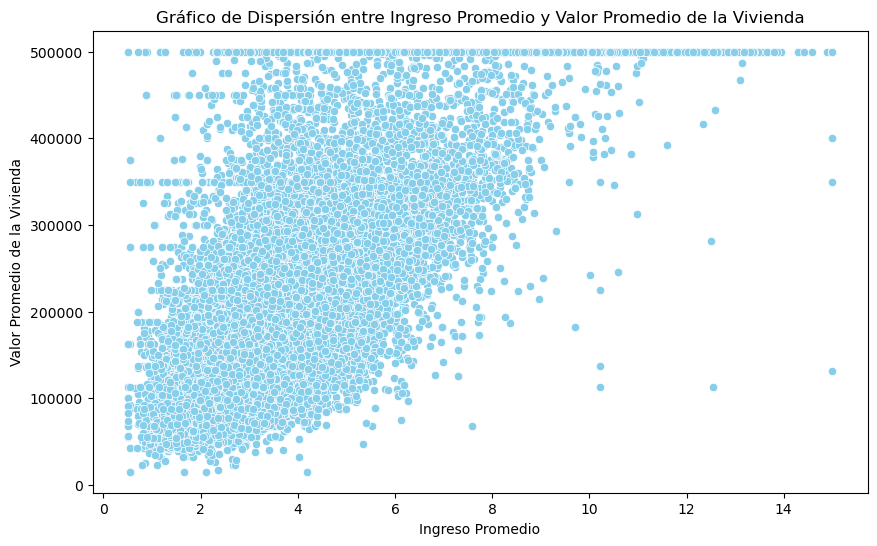

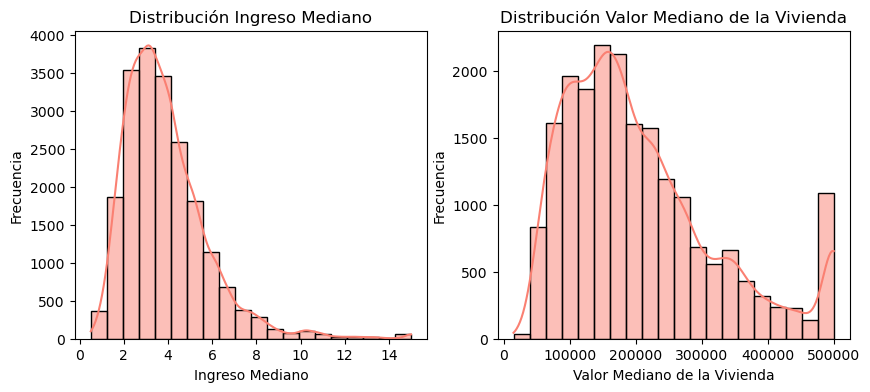

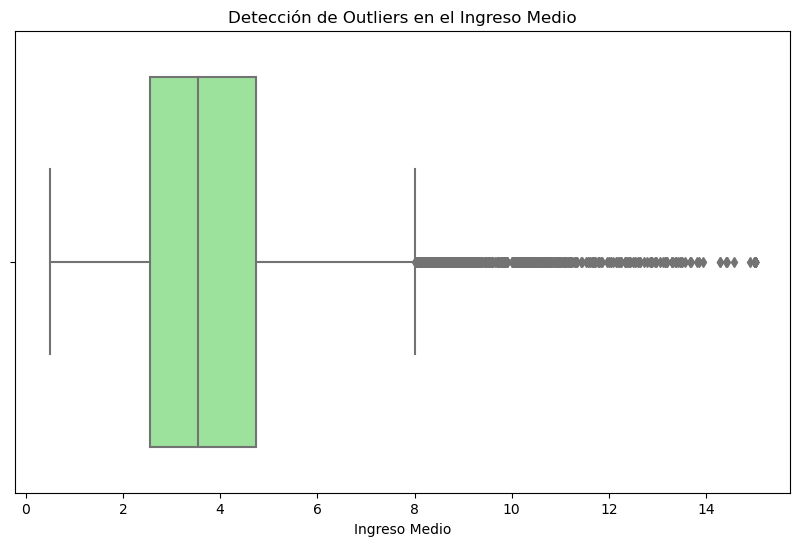

In [8]:
# Seleccionar las variables de interés, donde se comparara
# ingreso con el valor de la vivienda
columnas = ['median_income', 'median_house_value']
da = df[columnas]

# Gráfico de dispersión
plt.figure(figsize=(10, 6))
sns.scatterplot(data=da, x='median_income', y='median_house_value', color='skyblue')
plt.title('Gráfico de Dispersión entre Ingreso Promedio y Valor Promedio de la Vivienda')
plt.xlabel('Ingreso Promedio')
plt.ylabel('Valor Promedio de la Vivienda')
plt.show()

# Histogramas
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

sns.histplot(x=df['median_income'], bins=20, color="salmon", alpha=0.5, kde=True, ax=axs[0])
axs[0].set_title('Distribución Ingreso Mediano')
axs[0].set_xlabel('Ingreso Mediano')
axs[0].set_ylabel('Frecuencia')

sns.histplot(x=df['median_house_value'], bins=20, color="salmon", alpha=0.5, kde=True, ax=axs[1])
axs[1].set_title('Distribución Valor Mediano de la Vivienda')
axs[1].set_xlabel('Valor Mediano de la Vivienda')
axs[1].set_ylabel('Frecuencia')

plt.show()

# Detección de outliers mediante gráfico de bigote o caja
plt.figure(figsize=(10, 6))
sns.boxplot(data=da, x='median_income', color='lightgreen')
plt.title('Detección de Outliers en el Ingreso Medio')
plt.xlabel('Ingreso Medio')
plt.show()


En el siguiente análisis, se examinará la distribución de diversas medidas de tendencia central, incluyendo la media, la moda y la mediana en el caso particular de la distribución del ingreso medio. Además, se explorará la correlación entre el ingreso medio y el valor promedio de las viviendas mediante distintos métodos, como Spearman, Kendall y Pearson. El objetivo es comprender de qué manera estas variables están relacionadas entre sí.

In [9]:
# Medidas de tendencia central
median_income_median = da['median_income'].median()
median_income_mean = da['median_income'].mean()
median_income_mode = da['median_income'].mode().values[0]

print(f"Mediana del Ingreso: {median_income_median:.3}\n")
print(f"Promedio del Ingreso: {median_income_mean:.3}\n")
print(f"Moda del Ingreso: {median_income_mode:.3}\n")

# Medidas de dispersión
median_income_variance = da['median_income'].var()
median_income_std = da['median_income'].std()

print(f"Varianza en el Ingreso: {median_income_variance:.3}\n")
print(f"Desviación Estándar del Ingreso: {median_income_std:.3}\n")

# Medidas de correlación
correlation_pearson = da.corr(method='pearson')
correlation_spearman = da.corr(method='spearman')
correlation_kendall = da.corr(method='kendall')

print("Correlación (Pearson):\n")
print(correlation_pearson)

print("\nCorrelación (Spearman):\n")
print(correlation_spearman)

print("\nCorrelación (Kendall):\n")
print(correlation_kendall)


Mediana del Ingreso: 3.54

Promedio del Ingreso: 3.87

Moda del Ingreso: 3.12

Varianza en el Ingreso: 3.61

Desviación Estándar del Ingreso: 1.9

Correlación (Pearson):

                    median_income  median_house_value
median_income            1.000000            0.688355
median_house_value       0.688355            1.000000

Correlación (Spearman):

                    median_income  median_house_value
median_income            1.000000            0.677108
median_house_value       0.677108            1.000000

Correlación (Kendall):

                    median_income  median_house_value
median_income            1.000000            0.495859
median_house_value       0.495859            1.000000


**Comentarios respecto a los estadísticos:**

Como se puede observar en el histograma de Ingreso Medio, se ve que se tiene un sesgo hacia la derecha, esto que se ve a simple vista, se confirma al observar las medidas de tendencia central, la media es mayor que la mediana, lo que confirma lo que se ve a simple vista. A su vez la varianza y la desviación estandar tienen un valor bastante elevado. Ya que con tan solo 2 desviaciones estandar se llegaria al mínimo valor de Ingreso, que es 0. Esto se puede deber a una gran cantidad de outliers, cosa que se confirma al observar el gráfico de caja y bigote.

Al observarse la correlación entre el ingreso medio, y el valor medio de una casa se puede observar que se tiene una correlación de Pearson de 0.69, muy similar al que se encuentra con la correlación de Spearman. En cambio la correlación de Kendall es menor, esto se puede deber a que se tienen muchos datos, y la correlación de Kendall es más útil cuando no se cuenta con tantos datos. La correlación es positiva, y alta.

## Ejercicio 2: Regresión Líneal

A continuación se elaborará una regresión líneal simple con las variables de Ingreso Medio, con respecto al valor promedio de la vivienda.

Al observar los histogramas, se ve que el valor de la vivienda máxima se repite varias veces, lo que podria indicar que al momento de recopilar estos datos se utilizo un valor máximo, y todas las casas que valieran más de esto se asignariann a este valor. Esto se analizará contando la cantidad de veces que se repite este valor:

In [10]:
# Seleccionar las variables de interés
columnas = ['median_income', 'median_house_value']
df_regresion = df[columnas]

# Seleccionar el valor máximo de la columna 'median_house_value'
valor_maximo = df_regresion['median_house_value'].max()

print(f'El valor máximo es {valor_maximo}')

# Contar la frecuencia del máximo valor en 'median_house_value'
conteo_max_value = df_regresion['median_house_value'].value_counts().loc[df_regresion['median_house_value'].max()]

print(f"El valor máximo se repite {conteo_max_value} veces en la columna 'median_house_value'.")

El valor máximo es 500001.0
El valor máximo se repite 958 veces en la columna 'median_house_value'.


Como se puede ver el valor se repite 965 veces, para facilitar el análisis y la posterior regresión líneal que se quiere hacer, se eliminaran estos valores.

In [11]:
# Eliminar filas donde 'median_house_value' es igual al valor máximo
df_regresion_2 = df_regresion[df_regresion['median_house_value'] != df_regresion['median_house_value'].max()]


# Comprobar si efectivamente se eliminaron los valores repetidos en 'median_house_value'
valor_maximo = df_regresion_2['median_house_value'].max()

print(f'El valor máximo es {valor_maximo}')

# Contar la frecuencia del máximo valor en 'median_house_value'
conteo_max_value = df_regresion_2['median_house_value'].value_counts().loc[df_regresion_2['median_house_value'].max()]

print(f"El valor máximo se repite {conteo_max_value} veces en la columna 'median_house_value'.")


El valor máximo es 500000.0
El valor máximo se repite 27 veces en la columna 'median_house_value'.


Como se puede ver, se eliminó correctamente el caso en el que el valor máximo se repite tantas veces, por lo que ahora se puede trabajar con los datos sin estos valores: 

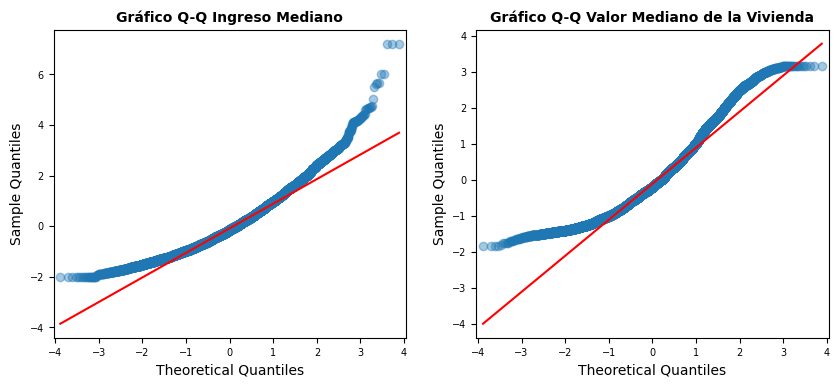

Prueba de Shapiro-Wilk para Ingreso Mediano:
Estadístico: 0.956, p-value: 0.0

Prueba de Shapiro-Wilk para Valor Mediano de la Vivienda:
Estadístico: 0.946, p-value: 0.0

Prueba D'Agostino's K-squared para Ingreso Mediano:
Estadístico: 1.68e+03, p-value: 0.0
Test Goldfeld-Quandt:
Estadístico: 1.15, p-value: 4.992587000221871e-10

Correlación Pearson: r=0.6427333348027169, p-value=0.0
Correlación Spearman: r=0.6511390069667621, p-value=0.0
Correlación Kendall: r=0.47052547112803295, p-value=0.0


In [12]:
# Gráficos Q-Q
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

sm.qqplot(
    df_regresion_2['median_income'],
    fit=True,
    line='q',
    alpha=0.4,
    lw=2,
    ax=axs[0]
)
axs[0].set_title('Gráfico Q-Q Ingreso Mediano', fontsize=10, fontweight="bold")
axs[0].tick_params(labelsize=7)

sm.qqplot(
    df_regresion_2['median_house_value'],
    fit=True,
    line='q',
    alpha=0.4,
    lw=2,
    ax=axs[1]
)
axs[1].set_title('Gráfico Q-Q Valor Mediano de la Vivienda', fontsize=10, fontweight="bold")
axs[1].tick_params(labelsize=7)

plt.show()

# Pruebas de normalidad
shapiro_test_income = stats.shapiro(df_regresion_2['median_income'])
shapiro_test_house_value = stats.shapiro(df_regresion_2['median_house_value'])

print("Prueba de Shapiro-Wilk para Ingreso Mediano:")
print(f"Estadístico: {shapiro_test_income.statistic:.3}, p-value: {shapiro_test_income.pvalue}")

print("\nPrueba de Shapiro-Wilk para Valor Mediano de la Vivienda:")
print(f"Estadístico: {shapiro_test_house_value.statistic:.3}, p-value: {shapiro_test_house_value.pvalue}")

# Pruebas D'Agostino's K-squared
k2_income, p_value_income = stats.normaltest(df_regresion_2['median_income'])
k2_house_value, p_value_house_value = stats.normaltest(df_regresion_2['median_house_value'])

print("\nPrueba D'Agostino's K-squared para Ingreso Mediano:")
print(f"Estadístico: {k2_house_value:.3}, p-value: {p_value_house_value}")

# Test Goldfeld-Quandt
from statsmodels.stats.diagnostic import het_goldfeldquandt

# Supongamos que 'variable_predictora' es 'median_income' y 'variables_de_respuesta' es 'median_house_value'
gq_result = het_goldfeldquandt(df_regresion_2['median_house_value'], df_regresion_2[['median_income']], drop=0.2)

# Obtener los valores relevantes del resultado
gq_test_statistic = gq_result[0]
gq_p_value = gq_result[1]

print(f"Test Goldfeld-Quandt:")
print(f"Estadístico: {gq_test_statistic:.3}, p-value: {gq_p_value}")


# Cálculo de correlación y significancia con Scipy
r_pearson, p_pearson = stats.pearsonr(df_regresion_2['median_income'], df_regresion_2['median_house_value'])
print(f"\nCorrelación Pearson: r={r_pearson}, p-value={p_pearson}")

r_spearman, p_spearman = stats.spearmanr(df_regresion_2['median_income'], df_regresion_2['median_house_value'])
print(f"Correlación Spearman: r={r_spearman}, p-value={p_spearman}")

r_kendall, p_kendall = stats.kendalltau(df_regresion_2['median_income'], df_regresion_2['median_house_value'])
print(f"Correlación Kendall: r={r_kendall}, p-value={p_kendall}")

Al observar los resultados de este análisis de datos se puede concluir que: 

1. **Gráficos Q-Q:**
   - En el gráfico Q-Q del Ingreso Mediano, se aprecia una tendencia convexa que diverge de la línea esperada,  En este caso, la convexidad indica que hay valores extremos en el extremo superior de la distribución del Ingreso Mediano. Esto podría representar ingresos más altos de lo esperado bajo una distribución normal
   - El gráfico Q-Q del Valor Mediano de la Vivienda muestra una forma en S, indicando una distribución que no sigue linealmente la normalidad. La forma en S sugiere que hay valores extremos tanto en el extremo inferior como en el superior de la distribución del Valor Mediano de la Vivienda. Estos valores extremos podrían representar propiedades con valores inusualmente bajos o altos.

2. **Pruebas de Normalidad (Shapiro-Wilk y D'Agostino's K-squared):**
   - Los resultados de las pruebas de normalidad (Shapiro-Wilk) para el Ingreso Mediano y el Valor Mediano de la Vivienda indican que las variables no siguen una distribución normal (p-value = 0.0 en ambos casos).
   - Además, las pruebas D'Agostino's K-squared también respaldan la evidencia de NO normalidad, ya que los valores de p son prácticamente cero.

3. **Test Goldfeld-Quandt:**
  
   - El test Goldfeld-Quandt se utiliza para evaluar la homocedasticidad en un modelo de regresión. En este caso, el estadístico de prueba es de 1.055, y el valor p asociado es de 0.0182. Un valor p (inferior a 0.05) sugiere evidencia para rechazar la hipótesis nula de homocedasticidad, por lo que en este caso se asume que nuestro modelo no presenta homocedasticidad. Esto indica que la varianza de los errores no es constante a lo largo de los valores de la variable predictora en el modelo de regresión.

4. **Correlación (Pearson, Spearman, Kendall):**
   - Los coeficientes de correlación son positivos y significativos (p-value = 0.0) en todos los casos, aunque menor al caso de no eliminar todos los datos que eran "iguales".


5. **Conclusión:**
   - A pesar de la no normalidad y la heterocedasticidad identificadas, la fuerte correlación positiva respalda una relación significativa entre el Ingreso Mediano y el Valor Mediano de la Vivienda. Estos hallazgos deben considerarse al aplicar el modelo de regresión lineal simple, reconociendo las posibles limitaciones en la interpretación de los resultados.

### Implementación del modelo:

Se ha decidido dividir el conjunto de datos utilizando una proporción comúnmente utilizada: el 80% de los datos se destinarán al conjunto de entrenamiento, mientras que el 20% restante se reservará para el conjunto de prueba. Esta división nos permitirá ajustar nuestro modelo a un conjunto significativo de datos y luego evaluar su desempeño en datos independientes, brindándonos una visión más completa de su capacidad predictiva.

In [13]:
# División de los datos en train y test
X = df_regresion_2[['median_income']]
y = df_regresion_2['median_house_value']

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    train_size=0.8,
    random_state=1234,
    shuffle=True
)

# Creación del modelo utilizando matrices como en scikit-learn
# A la matriz de predictores se le tiene que añadir una columna de 1s para el intercepto del modelo
X_train = sm.add_constant(X_train, prepend=True)
modelo = sm.OLS(endog=y_train, exog=X_train)

modelo = modelo.fit()

# Obtener los coeficientes y estadísticas del modelo
coeficientes = modelo.params
estadisticas = modelo.summary()

# Imprimir los resultados
print("Coeficientes:")
print(coeficientes)
print("\nEstadísticas del modelo:")
print(estadisticas)


Coeficientes:
const            44750.858251
median_income    40003.817024
dtype: float64

Estadísticas del modelo:
                            OLS Regression Results                            
Dep. Variable:     median_house_value   R-squared:                       0.417
Model:                            OLS   Adj. R-squared:                  0.417
Method:                 Least Squares   F-statistic:                 1.116e+04
Date:                Fri, 26 Jan 2024   Prob (F-statistic):               0.00
Time:                        13:13:38   Log-Likelihood:            -1.9685e+05
No. Observations:               15580   AIC:                         3.937e+05
Df Residuals:                   15578   BIC:                         3.937e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
-------------

Se obtiene un coeficiente de determinación $R^2$ de 0.417, el cual no se clasifica como particularmente alto. Sin embargo, es importante realizar pruebas adicionales para evaluar la precisión y confiabilidad de nuestra predicción.

A continuación se hace un modelo de predicción tomando como base el modelo previamente ajustado. 

Y se creara un gráfico de dispersión con las predicciones, y donde se pueda visualizar un intervalo de confianza del 95%, junto con la línea de regresión.

El error (rmse) de test es: 77100.39801416238
                            OLS Regression Results                            
Dep. Variable:     median_house_value   R-squared:                       0.417
Model:                            OLS   Adj. R-squared:                  0.417
Method:                 Least Squares   F-statistic:                 1.116e+04
Date:                Fri, 26 Jan 2024   Prob (F-statistic):               0.00
Time:                        13:13:38   Log-Likelihood:            -1.9685e+05
No. Observations:               15580   AIC:                         3.937e+05
Df Residuals:                   15578   BIC:                         3.937e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------


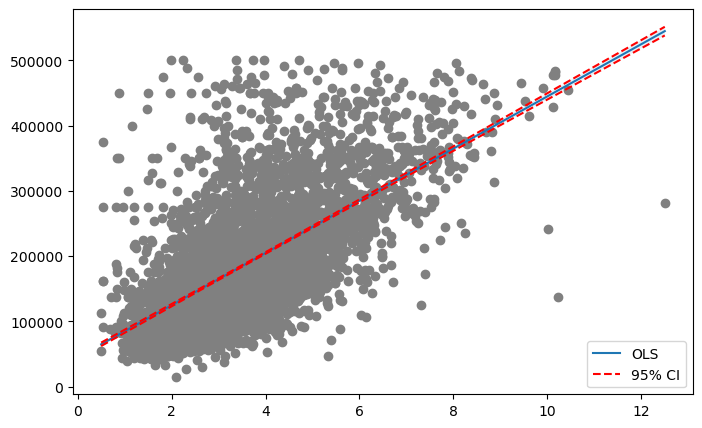

In [14]:
# Predicciones con intervalo de confianza del 95%
X_test = sm.add_constant(X_test, prepend=True)
predicciones_test = modelo.get_prediction(exog=X_test).summary_frame(alpha=0.05)

# Cálculo del RMSE
rmse = mean_squared_error(
    y_true=y_test,
    y_pred=predicciones_test['mean'],
    squared=False
)
print(f"El error (rmse) de test es: {rmse}")

print(modelo.summary())

# Gráfico del modelo
predicciones_test['x'] = X_test['median_income']
predicciones_test['y'] = y_test
predicciones_test = predicciones_test.sort_values('x')

fig, ax = plt.subplots(figsize=(8, 5))

ax.scatter(predicciones_test['x'], predicciones_test['y'], marker='o', color="gray")
ax.plot(predicciones_test['x'], predicciones_test["mean"], linestyle='-', label="OLS")
ax.plot(predicciones_test['x'], predicciones_test["mean_ci_lower"], linestyle='--', color='red', label="95% CI")
ax.plot(predicciones_test['x'], predicciones_test["mean_ci_upper"], linestyle='--', color='red')
ax.fill_between(predicciones_test['x'], predicciones_test["mean_ci_lower"], predicciones_test["mean_ci_upper"], alpha=0.1)
ax.legend()

plt.show()

## Ejercicio 3:
- Elabore un análisis con dos variables de su elección donde justifique el por qué no se podría aplicar una regresión lineal simple o múltiple o si la regresión obtenida sería demasiado pobre o inexacta para pronosticar resultados debido a la forma que toman los datos o a los resultados de estadísticos o pruebas estadísticas.

Se hará un heatmap para ver que variables muestran una baja correlación entre ellos, si 2 variables muestran una baja correlación no tiene caso aplicar una regresión líneal, ya sea simple o multiple.

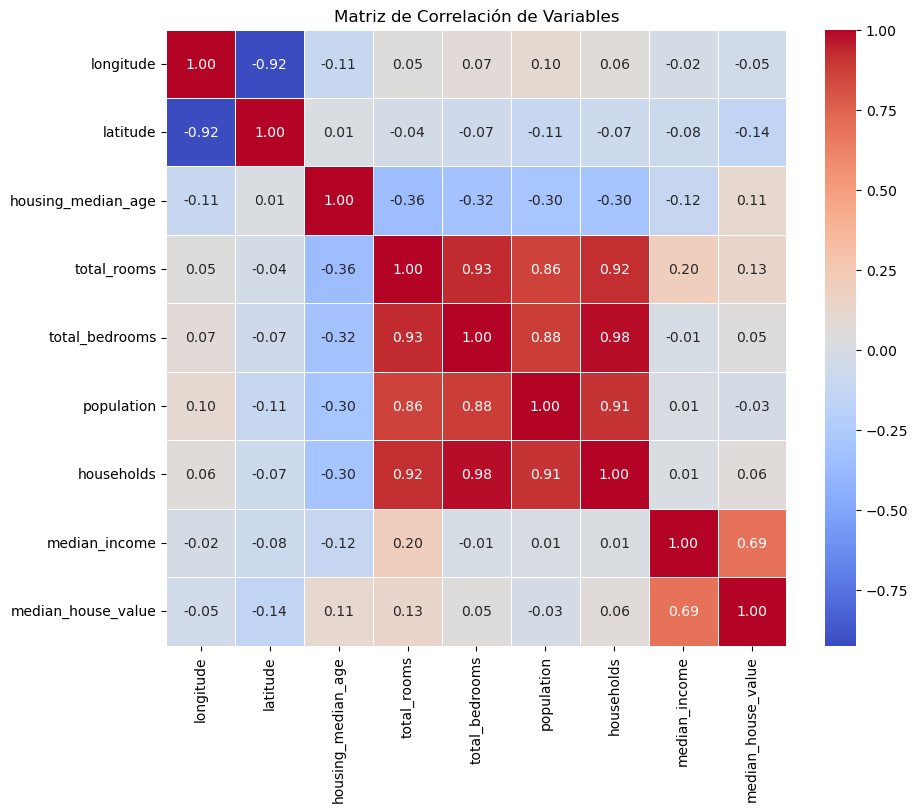

In [15]:
df_heatmap = df.drop('ocean_proximity',axis=1)

# Calcular la matriz de correlación
matriz_correlacion = df_heatmap.corr()

# Crear el heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(matriz_correlacion, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Matriz de Correlación de Variables')
plt.show()


Se observa que las variables "latitude" y "housing_median_age" presentan una correlación muy baja, a continuación se hara un gráfico de dispersión para ver si se lograra a ver alguna tendencia:

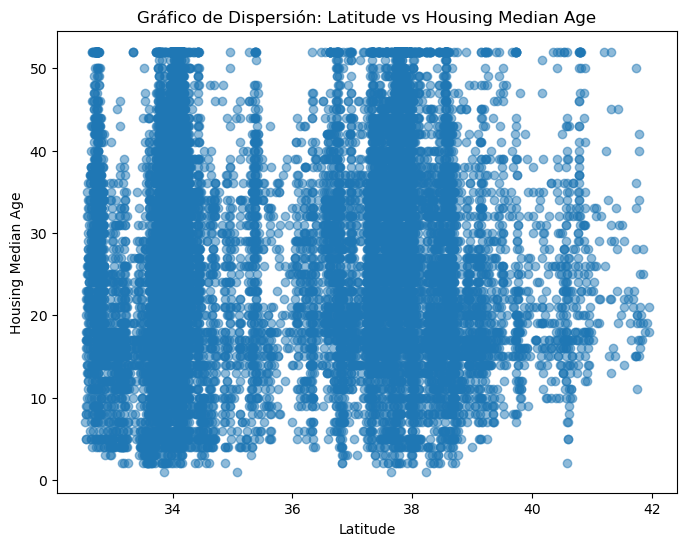

Correlación de Pearson: 0.0119
Correlación de Spearman: 0.033


In [16]:
# Seleccionar las columnas de interés
columnas = ['latitude', 'housing_median_age']
df_2 = df[columnas]

# Crear el gráfico de dispersión
plt.figure(figsize=(8, 6))
plt.scatter(df_2['latitude'], df_2['housing_median_age'], alpha=0.5)
plt.title('Gráfico de Dispersión: Latitude vs Housing Median Age')
plt.xlabel('Latitude')
plt.ylabel('Housing Median Age')
plt.show()

# Calcular la correlación de Spearman
spearman_corr = df_2.corr(method='spearman').loc['latitude', 'housing_median_age']

# Calcular la correlación de Pearson
pearson_corr = df_2.corr(method='pearson').loc['latitude', 'housing_median_age']

print(f"Correlación de Pearson: {pearson_corr:.3}")
print(f"Correlación de Spearman: {spearman_corr:.3}")


En conclusión, en el análisis de las variables `latitude` y `housing_median_age`, se graficó un diagrama de dispersión para visualizar la relación entre ellas. La dispersión de los puntos en el gráfico no muestra una tendencia clara o patrón lineal, indicando una falta de relación lineal aparente entre las dos variables. Este hallazgo se refuerza al calcular las correlaciones de Pearson y Spearman, que son 0.012 y 0.033, respectivamente. Ambos valores cercanos a cero sugieren una correlación insignificante entre las variables.

Como recordatorio, la correlación de Pearson mide la relación lineal, mientras que la correlación de Spearman evalúa relaciones monótonas, y en ambos casos, la proximidad a cero indica que no existe una dependencia lineal o monótona entre las variables `latitude` y `housing_median_age`. 

Por lo tanto, se concluye que una regresión lineal, ya sea simple o múltiple, sería inapropiada o proporcionaría un ajuste deficiente para predecir resultados.

## Ejercicio 4: Regresión Polinómica:

- Aplique una regresión polinómica de grado par (menor a 7) y otra de grado impar que sea mayor al numero par seleccionado. Determine tanto gráficamente como mediante alguno de los estadísticos o pruebas existentes cuál de las dos regresiones calculadas se ajusta mejor para realizar pronósticos más acertados o justifique si ambos están sobre-ajustados o en el caso menos común, si es demasiado pobre el ajuste por ámbos métodos

Se utilizarán las columnas 'median_income' y 'median_house_value' en la aplicación de la regresión logística con el objetivo de evaluar las variaciones en el ajuste del modelo en comparación con el caso de regresión lineal. Con fines demostrativos, se ha decidido emplear un polinomio de grado 2 como ejemplo de un polinomio de grado par. Asimismo, para ilustrar un escenario de polinomio de grado impar, se ha seleccionado un polinomio de grado 6.

En la práctica, el uso de polinomios con grados superiores al segundo es poco común, ya que esto puede conducir a un sobreajuste del modelo. Sin embargo, en este caso, se llevará a cabo con el propósito demostrativo. Es fundamental tener en cuenta que la elección del grado del polinomio debe basarse en una cuidadosa evaluación del equilibrio entre la complejidad del modelo y su capacidad de generalización.

### Regresión polinómica de grado 2:

In [70]:
# División de los datos en train y test
X = df_regresion_2[['median_income']]
y = df_regresion_2['median_house_value']

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    train_size=0.8,
    random_state=1234,
    shuffle=True
)

# Grado del polinomio par
grado_polinomio_par = 2

# Creación de las características del polinomio:
poly_par = PolynomialFeatures(degree=grado_polinomio_par)
X_train_poly_par = poly_par.fit_transform(X_train)
X_test_poly_par = poly_par.transform(X_test)

# Crear el modelo de regresión lineal con polinomio
modelo_polinomio_par = sm.OLS(y_train, X_train_poly_par).fit()

# Imprimir resumen para el polinomio par
print(f'Resumen del modelo polinomio par (Grado {grado_polinomio_par}): ')
print(modelo_polinomio_par.summary())

# Predicciones con intervalo de confianza del 95%
predicciones_test_par = modelo_polinomio_par.predict(X_test_poly_par)

# Calcular RMSE
rmse_polinomio_par = mean_squared_error(y_test, predicciones_test_par, squared=False)
print(f'RMSE: {rmse_polinomio_par:.3}')



Resumen del modelo polinomio par (Grado 2): 
                            OLS Regression Results                            
Dep. Variable:     median_house_value   R-squared:                       0.418
Model:                            OLS   Adj. R-squared:                  0.418
Method:                 Least Squares   F-statistic:                     5596.
Date:                Fri, 26 Jan 2024   Prob (F-statistic):               0.00
Time:                        16:48:47   Log-Likelihood:            -1.9684e+05
No. Observations:               15580   AIC:                         3.937e+05
Df Residuals:                   15577   BIC:                         3.937e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const  

### Regresión polinómica de grado impar: 

In [71]:
# Grado del polinomio impar
grado_polinomio_impar = 6

# Crear las características polinómicas
poly_impar = PolynomialFeatures(degree=grado_polinomio_impar)
X_train_poly_impar = poly_impar.fit_transform(X_train)
X_test_poly_impar = poly_impar.transform(X_test)

# Crear el modelo de regresión lineal con polinomio
modelo_polinomio_impar = sm.OLS(y_train, X_train_poly_impar).fit()

# Imprimir resumen para el polinomio impar
print(f"Resumen del modelo Polinomio Impar (Grado {grado_polinomio_impar}):")
print(modelo_polinomio_impar.summary())

# Predicciones con intervalo de confianza del 95%
predicciones_test_impar = modelo_polinomio_impar.predict(X_test_poly_impar)

# Calcular RMSE
rmse_polinomio_impar = mean_squared_error(y_test, predicciones_test_impar, squared=False)
print(f'RMSE: {rmse_polinomio_impar:.3}')


Resumen del modelo Polinomio Impar (Grado 6):
                            OLS Regression Results                            
Dep. Variable:     median_house_value   R-squared:                       0.423
Model:                            OLS   Adj. R-squared:                  0.423
Method:                 Least Squares   F-statistic:                     1904.
Date:                Fri, 26 Jan 2024   Prob (F-statistic):               0.00
Time:                        16:48:49   Log-Likelihood:            -1.9677e+05
No. Observations:               15580   AIC:                         3.935e+05
Df Residuals:                   15573   BIC:                         3.936e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const 

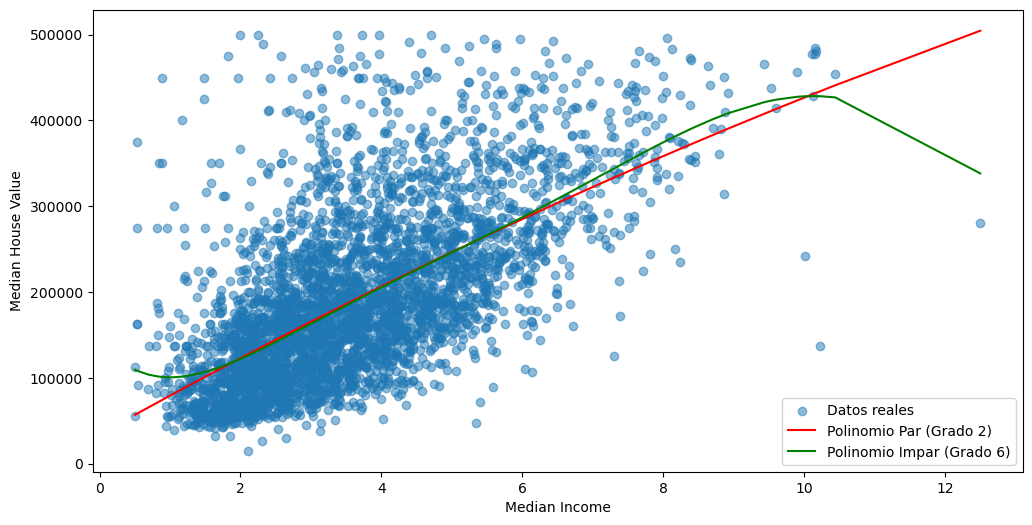

In [72]:
# Ordenar los datos de prueba para graficar el polinomio par
X_test_sorted = np.sort(X_test, axis=0)
y_pred_sorted_par = modelo_polinomio_par.predict(poly_par.transform(X_test_sorted))

# Ordenar los datos de prueba para graficar el polinomio impar
X_test_sorted = np.sort(X_test, axis=0)
y_pred_sorted_impar = modelo_polinomio_impar.predict(poly_impar.transform(X_test_sorted))

# Grafico de los resultados
plt.figure(figsize=(12, 6))
plt.scatter(X_test, y_test, label='Datos reales', alpha=0.5)
plt.plot(X_test_sorted, y_pred_sorted_par, label=f'Polinomio Par (Grado {grado_polinomio_par})', color='red')
plt.plot(X_test_sorted, y_pred_sorted_impar, label=f'Polinomio Impar (Grado {grado_polinomio_impar})', color='green')
plt.xlabel('Median Income')
plt.ylabel('Median House Value')
plt.legend()
plt.show()

En este caso, se observa que el modelo de mayor grado presentó un mejor ajuste, pero es importante considerar la posibilidad de sobreajuste, como se evidencia en la gráfica que ilustra el comportamiento del modelo de manera visual.

**Algunas conclusiones que se pueden sacar al respecto del modelo son:**
1. **R-squared Similar:** Ambos modelos exhiben un R-squared muy similar, lo que sugiere que explican aproximadamente la misma cantidad de variabilidad en la variable dependiente.
2. **Coeficientes y Términos del Modelo:** Aunque comparten similitudes en términos de rendimiento, las diferencias en los coeficientes y la estructura del modelo (grado par vs. grado impar) indican que podrían estar capturando patrones ligeramente diferentes en los datos.
3. **RMSE Similar:** La similitud en los valores de RMSE señala que ambos modelos tienen un rendimiento de predicción equiparable.

En resumen, la elección entre un modelo de grado par o impar puede depender de la interpretación y preferencia del analista. A pesar de la similitud en el rendimiento en los datos de prueba, es crucial considerar la complejidad del modelo y evitar sobreajustes, especialmente al trabajar con polinomios de grados más elevados.

## Ejercicio 5: Análisis de Supervivencia:

Elabore un análisis de supervivencia para alguna de las variables que usted considere que sea más idónea realizar un análisis de esta naturaleza y determine el tiempo que debe de pasar (junto con sus intervalos de confianza) para que un sujeto de su muestra de datos tenga la misma probabilidad de supervivencia y de riesgo o peligro

Se seleccionaron las variables `housing_median_age` y `median_house_value` para llevar a cabo un análisis de supervivencia, considerando su idoneidad para evaluar el impacto de la antigüedad de las viviendas en su depreciación. Se estableció el **evento** de interés como la **pérdida del 75% del valor inicial** de la vivienda, utilizando la **edad media de la vivienda** como la **duración**. Se ajustó un modelo de Kaplan-Meier y se visualizó la función de supervivencia para examinar la variación en la probabilidad de conservar al menos el 75% del valor a lo largo de la edad media de la vivienda. Posteriormente, se calcularon el tiempo mediano de supervivencia y sus intervalos de confianza para obtener una comprensión más detallada del fenómeno analizado.

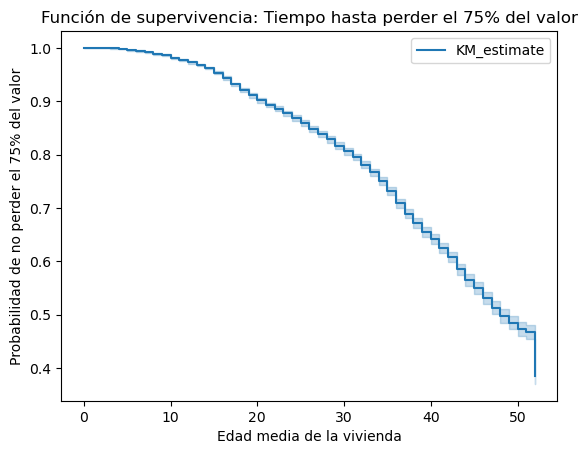

Tiempo mediano de supervivencia: 48.0
Intervalo de confianza (95%) para el tiempo mediano de supervivencia:
     KM_estimate_lower_0.95  KM_estimate_upper_0.95
0.5                    48.0                    49.0


In [78]:
# Supongamos que 'housing_median_age' es la edad media de la vivienda y 'median_house_value' es el valor medio de la vivienda
df_survival = df[['housing_median_age', 'median_house_value']]

# Definir el evento y la duración
df_survival['event'] = df_survival['median_house_value'] <= 0.25 * df_survival['median_house_value'].max()
df_survival['duration'] = df_survival['housing_median_age']

# Crear un objeto Kaplan-Meier
kmf = KaplanMeierFitter()

# Ajustar el modelo de Kaplan-Meier
kmf.fit(durations=df_survival['duration'], event_observed=df_survival['event'])

# Graficar la función de supervivencia
kmf.plot_survival_function()
plt.title('Función de supervivencia: Tiempo hasta perder el 75% del valor')
plt.xlabel('Edad media de la vivienda')
plt.ylabel('Probabilidad de no perder el 75% del valor')
plt.show()

# Calcular el tiempo mediano de supervivencia y sus intervalos de confianza
median_survival_time = kmf.median_survival_time_
median_confidence_interval = median_survival_times(kmf.confidence_interval_)

print(f"Tiempo mediano de supervivencia: {median_survival_time}")
print(f"Intervalo de confianza (95%) para el tiempo mediano de supervivencia:\n{median_confidence_interval}")

El análisis de supervivencia muestra que el tiempo mediano de supervivencia para el evento de interés (pérdida del 75% del valor de las viviendas) es de 48.0 unidades de tiempo. Además, se proporciona un intervalo de confianza del 95%, que va desde 47.0 hasta 49.0 unidades de tiempo. Esto significa que, con un nivel de confianza del 95%, se estima que la mediana del tiempo de supervivencia se encuentra en este rango. En términos prácticos, podemos interpretar esto como que, en promedio, se espera que las viviendas pierdan el 75% de su valor en aproximadamente 48 unidades de tiempo, y este valor tiene una alta probabilidad de estar dentro del intervalo mencionado.